In [1]:
import pandas as pd
from multiprocessing import Pool
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["svg.fonttype"] = "none"  # Ensures the text is not converted to paths

In [2]:
paris_data = pd.read_csv('/ceph/hpc/home/novljanj/data_storage/projects/semi_oops_project/Data/PARIS/hybrids/mES_no_rRNA_or_tRNA_curated.tsv', sep='\t')
paris_intra_data = paris_data[paris_data['type'] == 'intragenic']
paris_intra_data_L = paris_intra_data[['L_genomic_seqnames', 'L_genomic_start', 'L_genomic_end', 'L_genomic_strand', 'L_gene_name', 'L_region', 'intragroup']]
paris_intra_data_R = paris_intra_data[['R_genomic_seqnames', 'R_genomic_start', 'R_genomic_end', 'R_genomic_strand', 'R_gene_name', 'R_region', 'intragroup']]
paris_intra_data_L.columns = ['Chromosome', 'Start', 'End', 'Strand', 'gene_name', 'region', 'intragroup']
paris_intra_data_R.columns = ['Chromosome', 'Start', 'End', 'Strand', 'gene_name', 'region', 'intragroup']
paris_intra_data = pd.concat([paris_intra_data_L, paris_intra_data_R])
paris_intra_data

paris_intra_data["region"].value_counts()

region
CDS           531582
intron        403291
UTR3          211018
UTR5           49791
ncRNA          45592
intergenic        18
Name: count, dtype: int64

In [3]:
lengths = pd.read_csv('/ceph/hpc/home/novljanj/data_storage/projects/smOOPS_paper/Data/machine_learning_input_prep/naive_transcripts_with_fasta_clip_m6a_paris_intra_paris_inter_postar3_collapsed.bed', sep='\t')
lengths["sequence_length"] = lengths["sequence"].str.len()
lengths = lengths[["transcript_id", "sequence_length"]]
lengths

,transcript_id,sequence_length
0,ENSMUST00000000080.8,4225
1,ENSMUST00000000312.12,4430
2,ENSMUST00000000314.13,6388
3,ENSMUST00000000543.6,2033
4,ENSMUST00000000619.8,4607
...,...,...
1676,ENSMUST00000239512.1,4451
1677,ENSMUST00000239552.1,12332
1678,ENSMUST00000240231.1,191
1679,ENSMUST00020182009.1,57


In [4]:
masterfile = pd.read_csv('/ceph/hpc/home/novljanj/data_storage/projects/smOOPS_paper/Data/masterfile_with_feature_lengths/all_smOOPS_and_controls_V2_with_feature_lengths.tsv', sep="\t")
clusters = pd.read_csv('/ceph/hpc/home/novljanj/data_storage/projects/smOOPS_paper/Results/machine_learning_results/cluster_assignment_file/sequence::global_iclip:paris_intramol:postar3_joined_clusters.tsv', sep="\t")
masterfile = pd.merge(masterfile, clusters, on="transcript_id", how="left")
masterfile = masterfile[(masterfile['smoops_naive'] == True) | (masterfile['control_common'] == True)]
masterfile = pd.merge(masterfile, lengths, on="transcript_id", how="left")
masterfile

,chr,start,end,gene_id,feature,strand,gene_name,transcript_id,feature_length,smoops_naive,...,semi_epiSC_mean_tpm,semi_naive_mean_tpm,semi_diff_mean_count,semi_epiSC_mean_count,semi_naive_mean_count,cds_length,3utr_length,5utr_length,Cluster,sequence_length
0,chr1,7218333,7222361,ENSMUSG00000103509.2,transcript,+,Gm38372,ENSMUST00000194854.2,4028,True,...,3.246963,2.900858,304.666667,379.333333,167.666667,NaN,NaN,NaN,1.0,4028
1,chr1,13413786,13418428,ENSMUSG00000103085.2,transcript,-,Gm38120,ENSMUST00000195506.2,4642,True,...,0.602931,0.603083,44.000000,83.666667,43.193667,NaN,NaN,NaN,1.0,4642
2,chr1,13424706,13426954,ENSMUSG00000102664.2,transcript,-,Gm38380,ENSMUST00000195718.2,2248,True,...,1.189487,0.845126,35.666667,75.666667,26.000000,NaN,NaN,NaN,1.0,2248
3,chr1,13711706,13712972,ENSMUSG00000102982.2,transcript,-,Gm38319,ENSMUST00000194537.2,1266,False,...,2.142972,3.109152,24.333333,68.666667,48.333333,NaN,NaN,NaN,NaN,1266
4,chr1,13856106,13857103,ENSMUSG00000097711.2,transcript,-,Gm5523,ENSMUST00000180415.2,997,False,...,0.890171,1.177508,5.533333,22.092333,12.865000,NaN,NaN,NaN,NaN,997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,chrX,151215472,151217672,ENSMUSG00000087235.2,transcript,+,Gm4750,ENSMUST00000152262.2,2200,False,...,0.202716,0.394469,4.736333,10.756333,11.579000,NaN,NaN,NaN,NaN,2200
1677,chrX,151272656,151274856,ENSMUSG00000087569.2,transcript,-,Actb-ps1,ENSMUST00000140208.2,2200,False,...,0.394928,0.394426,4.470667,30.466000,7.996000,NaN,NaN,NaN,NaN,2200
1678,chrX,152281222,152284566,ENSMUSG00000050148.10,transcript,+,Ubqln2,ENSMUST00000060714.10,3344,True,...,7.746710,3.862087,345.404333,747.108333,179.380667,1914.0,1203.0,227.0,0.0,3344
1679,chrX,159945767,160041209,ENSMUSG00000000037.18,transcript,+,Scml2,ENSMUST00000112345.8,95442,False,...,1.378180,0.268154,166.666667,162.032333,13.666667,2703.0,1643.0,501.0,NaN,4847


In [5]:
def number_of_intra_per_gene_and_region(df1, df2):
    results = []

    for index, row in df2.iterrows():
        print("Processing index: ", index)
        gene = row['gene_name']

        if (pd.isna(row['5utr_length'])) or (pd.isna(row['cds_length'])) or (pd.isna(row['3utr_length'])):
            utr5_count, cds_count, utr3_count = np.nan, np.nan, np.nan
        else:
            utr5_count = 0 if row['5utr_length'] == 0 else df1[(df1['gene_name'] == gene) & (df1['region'] == 'UTR5')].shape[0] / row['5utr_length']
            cds_count = 0 if row['cds_length'] == 0 else df1[(df1['gene_name'] == gene) & (df1['region'] == 'CDS')].shape[0] / row['cds_length']
            utr3_count = 0 if row['3utr_length'] == 0 else df1[(df1['gene_name'] == gene) & (df1['region'] == 'UTR3')].shape[0] / row['3utr_length']

        results.append({
            'gene_name': gene,
            'region': 'utr5',
            'length': row['5utr_length'],
            'counts': utr5_count,
            'smoops_naive': row['smoops_naive'],
            'semi_naive_mean_count': row['semi_naive_mean_count'],
            'semi_naive_mean_tpm': row['semi_naive_mean_tpm']
        })    
        
        results.append({
            'gene_name': gene,
            'region': 'cds',
            'length': row['cds_length'],
            'counts': cds_count,
            'smoops_naive': row['smoops_naive'],
            'semi_naive_mean_count': row['semi_naive_mean_count'],
            'semi_naive_mean_tpm': row['semi_naive_mean_tpm']
        })
        
        results.append({
            'gene_name': gene,
            'region': 'utr3',
            'length': row['3utr_length'],
            'counts': utr3_count,
            'smoops_naive': row['smoops_naive'],
            'semi_naive_mean_count': row['semi_naive_mean_count'],
            'semi_naive_mean_tpm': row['semi_naive_mean_tpm']
        })
        
    return pd.DataFrame(results)

def number_of_intra_per_gene(df1, df2):

    results = []


    for index, row in df2.iterrows():
        print("Processing index: ", index)
        gene = row['gene_name']

        count = df1[(df1['gene_name'] == gene) & (df1['region'] != 'intron')].shape[0]


        results.append({
            'gene_name': gene,
            'region': 'full',
            "length": row['sequence_length'],
            'counts': count,
            'smoops_naive': row['smoops_naive'],
            'semi_naive_mean_count': row['semi_naive_mean_count'],
            'semi_naive_mean_tpm': row['semi_naive_mean_tpm']
        })
        
    return pd.DataFrame(results)

df_results_0 = number_of_intra_per_gene_and_region(paris_intra_data, masterfile[masterfile['Cluster'] != 1])
df_results_1 = number_of_intra_per_gene(paris_intra_data, masterfile[masterfile['Cluster'] != 0])


Processing index:  3
Processing index:  4
Processing index:  5
Processing index:  7
Processing index:  8
Processing index:  9
Processing index:  11
Processing index:  12
Processing index:  13
Processing index:  14
Processing index:  15
Processing index:  16
Processing index:  17
Processing index:  18
Processing index:  19
Processing index:  20
Processing index:  21
Processing index:  22
Processing index:  23
Processing index:  24
Processing index:  25
Processing index:  26
Processing index:  27
Processing index:  28
Processing index:  29
Processing index:  30
Processing index:  31
Processing index:  32
Processing index:  33
Processing index:  34
Processing index:  36
Processing index:  37
Processing index:  38
Processing index:  39
Processing index:  40
Processing index:  41
Processing index:  42
Processing index:  44
Processing index:  45
Processing index:  46
Processing index:  47
Processing index:  48
Processing index:  49
Processing index:  50
Processing index:  52
Processing index

In [6]:
df_results_0

,gene_name,region,length,counts,smoops_naive,semi_naive_mean_count,semi_naive_mean_tpm
0,Gm38319,utr5,NaN,NaN,False,48.333333,3.109152
1,Gm38319,cds,NaN,NaN,False,48.333333,3.109152
2,Gm38319,utr3,NaN,NaN,False,48.333333,3.109152
3,Gm5523,utr5,NaN,NaN,False,12.865000,1.177508
4,Gm5523,cds,NaN,NaN,False,12.865000,1.177508
...,...,...,...,...,...,...,...
4780,Scml2,cds,2703.0,0.000000,False,13.666667,0.268154
4781,Scml2,utr3,1643.0,0.000000,False,13.666667,0.268154
4782,Hccs,utr5,207.0,0.000000,False,302.000333,9.318443
4783,Hccs,cds,816.0,0.007353,False,302.000333,9.318443


In [7]:
def normalise_counts(df):
    df['counts_by_length'] = df['counts'] / df['length']
    df['normalized_counts'] = df['counts_by_length'] / df['semi_naive_mean_tpm']
    return df

df_results_0 = normalise_counts(df_results_0).dropna()  
df_results_1 = normalise_counts(df_results_1).dropna()  
df_results_0

,gene_name,region,length,counts,smoops_naive,semi_naive_mean_count,semi_naive_mean_tpm,counts_by_length,normalized_counts
6,Trpa1,utr5,27.0,0.000000,False,27.333333,0.489716,0.000000e+00,0.000000e+00
7,Trpa1,cds,3375.0,0.001778,False,27.333333,0.489716,5.267490e-07,1.075621e-06
8,Trpa1,utr3,861.0,0.000000,False,27.333333,0.489716,0.000000e+00,0.000000e+00
9,Rdh10,utr5,244.0,0.000000,False,37.666667,0.868191,0.000000e+00,0.000000e+00
10,Rdh10,cds,1023.0,0.000000,False,37.666667,0.868191,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...
4780,Scml2,cds,2703.0,0.000000,False,13.666667,0.268154,0.000000e+00,0.000000e+00
4781,Scml2,utr3,1643.0,0.000000,False,13.666667,0.268154,0.000000e+00,0.000000e+00
4782,Hccs,utr5,207.0,0.000000,False,302.000333,9.318443,0.000000e+00,0.000000e+00
4783,Hccs,cds,816.0,0.007353,False,302.000333,9.318443,9.010957e-06,9.670025e-07


/tmp/ipykernel_715879/200857763.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='region',
/tmp/ipykernel_715879/200857763.py:16: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x='region',
/tmp/ipykernel_715879/200857763.py:16: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(x='region',


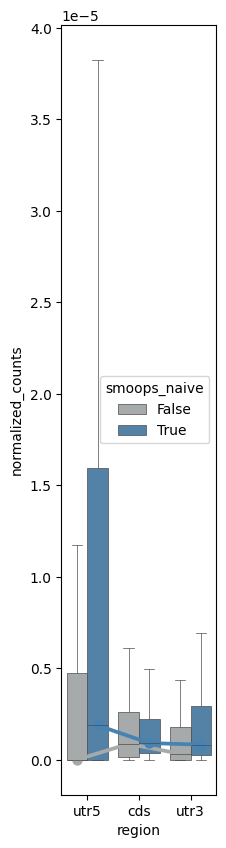

/tmp/ipykernel_715879/200857763.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='region',
/tmp/ipykernel_715879/200857763.py:16: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x='region',
/tmp/ipykernel_715879/200857763.py:16: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(x='region',


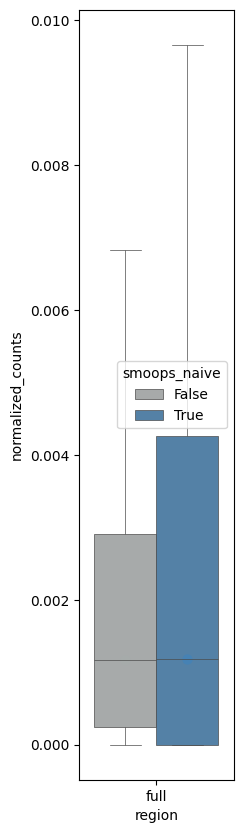

In [8]:
def plot_intra_per_gene_and_region(df_results_protein_coding):
    palette = ['#A6ABAA', '#4682B4']

    fig, ax = plt.subplots(1, 1, figsize=(2, 10))

    sns.boxplot(x='region', 
                y='normalized_counts', 
                hue='smoops_naive', 
                data=df_results_protein_coding, 
                ax=ax, 
                dodge=True, 
                showfliers=False, 
                linewidth=0.5, 
                palette=palette)

    sns.pointplot(x='region', 
                y='normalized_counts', 
                hue='smoops_naive', 
                data=df_results_protein_coding, 
                palette=palette,
                ax=ax, 
                dodge=0.4,  
                estimator="median",
                join=True,
                markers="o",
                scale=1,
                ci=None)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:2], labels[:2], title="smoops_naive")

    plt.show()

plot_intra_per_gene_and_region(df_results_0)   
plot_intra_per_gene_and_region(df_results_1)   